# Machine Learning Week 2 Assignment

In [1]:
#packages for data analysis
import numpy as np
import pandas as pd

import sklearn
from sklearn import svm

#to visualize data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

In [3]:
week2 = pd.read_csv('/Users/vivekbhadula/TCD Study/MachineLearning/Week2/Week2ML/week2ML.csv');
print(f'The shape of the given csv file is {week2.shape} \n')
print(week2.head())

The shape of the given csv file is (999, 3) 

   # id:6-12-6  Unnamed: 1  Unnamed: 2
0         0.63        0.19           1
1        -0.52        0.28           1
2         0.75       -0.05           1
3         0.02        0.79           1
4         0.61       -0.85          -1


In [5]:
X1 = week2.iloc[:,0]
X2 = week2.iloc[:,1]
x = np.column_stack((X1,X2))
y = week2.iloc[:,2]
print(x)
print(y)

[[ 0.63  0.19]
 [-0.52  0.28]
 [ 0.75 -0.05]
 ...
 [-0.71 -0.13]
 [-0.92  0.95]
 [-0.19  0.33]]
0      1
1      1
2      1
3      1
4     -1
      ..
994    1
995    1
996    1
997    1
998    1
Name: Unnamed: 2, Length: 999, dtype: int64


## (a) (i)

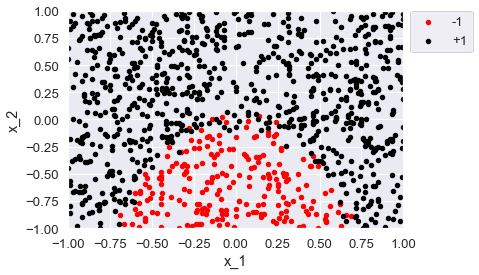

In [4]:
plt.xlabel('x_1')
plt.ylabel('x_2')

plt.scatter(X1[y==-1], X2[y==-1], color='red', label='-1', s=20)
plt.scatter(X1[y==1], X2[y==1], color='black', label='+1', s=20)

plt.legend(bbox_to_anchor=(1, 1.03)) 

plt.xlim(-1, 1) 
plt.ylim(-1, 1) 

plt.show()

## (a)(ii)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=16)
part_a2 = LogisticRegression(random_state=10) 
part_a2.fit(X_train, y_train)
print(f'The model intercept is : {part_a2.intercept_}')
print(f'The weights are : {part_a2.coef_}')

The model intercept is : [2.09836301]
The weights are : [[0.08446114 3.36462298]]


#### Influence:
The second feature, i.e., X2 has more weight than X1, hence X2 has more influence on the prediction.

## (a)(iii)

In [7]:
print(f'The model intercept is : {part_a2.intercept_} \n')
print(f'The weights are : {part_a2.coef_} \n')
print(f'The prediction rate on test data is : {part_a2.score(X_test,y_test)} \n')
print(f'The prediction rate on trained data is : {part_a2.score(X_train,y_train)} \n')
print(f'The confusion matrix for test data is : \n {confusion_matrix(y_test, part_a2.predict(X_test))} \n')
print(f'The confusion matrix for train data is : \n {confusion_matrix(y_train, part_a2.predict(X_train))} \n')
print(f'The model report on test data is : \n {classification_report(y_test, part_a2.predict(X_test))} \n')
print(f'The model report on trained data is : \n {classification_report(y_train, part_a2.predict(X_train))}')

The model intercept is : [2.09836301] 

The weights are : [[0.08446114 3.36462298]] 

The prediction rate on test data is : 0.885 

The prediction rate on trained data is : 0.8022528160200251 

The confusion matrix for test data is : 
 [[ 23  15]
 [  8 154]] 

The confusion matrix for train data is : 
 [[ 90  90]
 [ 68 551]] 

The model report on test data is : 
               precision    recall  f1-score   support

          -1       0.74      0.61      0.67        38
           1       0.91      0.95      0.93       162

    accuracy                           0.89       200
   macro avg       0.83      0.78      0.80       200
weighted avg       0.88      0.89      0.88       200
 

The model report on trained data is : 
               precision    recall  f1-score   support

          -1       0.57      0.50      0.53       180
           1       0.86      0.89      0.87       619

    accuracy                           0.80       799
   macro avg       0.71      0.70      0.70    

In [8]:
newPointsTrained = part_a2.predict(X_train)
newPointsTested = part_a2.predict(X_test)
allNewPoints = (np.concatenate((newPointsTrained, newPointsTested), axis=None))

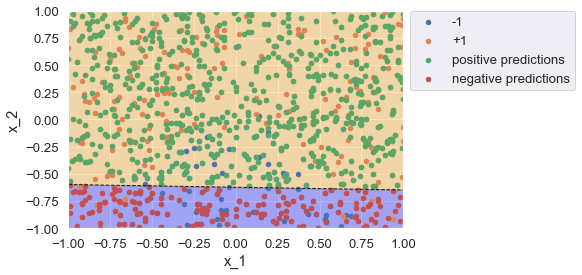

In [9]:
part_a2_intercept = part_a2.intercept_[0]
weight1, weight2 = part_a2.coef_.T

m = -weight1/weight2
c = -part_a2_intercept/weight2

xmin, xmax = -1, 1
ymin, ymax = -1, 1

x_arr = np.array([xmin, xmax])
y_point = m*x_arr + c

plt.plot(x_arr, y_point, 'k', lw=1, ls='--')

plt.ylabel('x_2')
plt.xlabel('x_1')

plt.fill_between(x_arr, y_point, ymin, color='blue', alpha=0.3)
plt.fill_between(x_arr, y_point, ymax, color='orange', alpha=0.3)

plt.scatter(X1[y==-1], X2[y==-1], s=20, alpha=1, label='-1')
plt.scatter(X1[y==1], X2[y==1], s=20, alpha=1, label='+1')
plt.scatter(*X_train[part_a2.predict(X_train)==1].T, s=20, alpha=1, label='positive predictions')
plt.scatter(*X_train[part_a2.predict(X_train)==-1].T, s=20, alpha=1, label='negative predictions')


plt.legend(bbox_to_anchor=(1, 1.03))

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

## (a)(iv) 
#### Accuracy = (True Positives + True Negatives)/(True Positives + True Negatives + False Positives + False Negatives)

#### On comparing the predicted and trained data, the accuracy of the test dataset comes out to be 89% while for the train dataset it is 80%. The logistic regression model does a good job in predicting the untrained data for the given dataset. There are other metrics that help us to understand better about how the above model performs. In the below cell, a confusion matrix is printed to visualise the number of True Positives, True Negatives, False Positives and False Negatives. 


## (b)(i)

In [10]:
b1 = sklearn.svm.LinearSVC(random_state=1, C=0.001)
b1.fit(X_train, y_train)
print(b1.intercept_, b1.score(X_train, y_train), b1.score(X_test, y_test))

[0.33805411] 0.7747183979974969 0.81


In [11]:
b2 = sklearn.svm.LinearSVC(random_state=1, C=1)
b2.fit(X_train, y_train)
print(b2.intercept_, b2.score(X_train, y_train), b2.score(X_test, y_test))

[0.74236093] 0.8035043804755945 0.89


In [12]:
b3 = sklearn.svm.LinearSVC(random_state=1, C=100, dual=False)
b3.fit(X_train, y_train)
print(b3.intercept_, b3.score(X_train, y_train), b3.score(X_test, y_test))

[0.7481839] 0.804755944931164 0.895


In [13]:
print('This is for C=0.001')
print(f'The model intercept is : {b1.intercept_} \n')
print(f'The slopes are : {b1.coef_} \n')
print(f'The prediction rate on test data is : {b1.score(X_test,y_test)} \n')
print(f'The prediction rate on trained data is : {b1.score(X_train,y_train)} \n')
print(f'The confusion matrix for test data is : \n {confusion_matrix(y_test, b1.predict(X_test))} \n')
print(f'The confusion matrix for train data is : \n {confusion_matrix(y_train, b1.predict(X_train))} \n')
print(f'The model report on test data is : \n {classification_report(y_test, b1.predict(X_test))} \n')
print(f'The model report on trained data is : \n {classification_report(y_train, b1.predict(X_train))}')

print('This is for C=1')
print(f'The model intercept is : {b2.intercept_} \n')
print(f'The slopes are : {b2.coef_} \n')
print(f'The prediction rate on test data is : {b2.score(X_test,y_test)} \n')
print(f'The prediction rate on trained data is : {b2.score(X_train,y_train)} \n')
print(f'The confusion matrix for test data is : \n {confusion_matrix(y_test, b2.predict(X_test))} \n')
print(f'The confusion matrix for train data is : \n {confusion_matrix(y_train, b2.predict(X_train))} \n')
print(f'The model report on test data is : \n {classification_report(y_test, b2.predict(X_test))} \n')
print(f'The model report on trained data is : \n {classification_report(y_train, b2.predict(X_train))}')

print('This is for C=100')
print(f'The model intercept is : {b3.intercept_} \n')
print(f'The slopes are : {b3.coef_} \n')
print(f'The prediction rate on test data is : {b3.score(X_test,y_test)} \n')
print(f'The prediction rate on trained data is : {b3.score(X_train,y_train)} \n')
print(f'The confusion matrix for test data is : \n {confusion_matrix(y_test, b3.predict(X_test))} \n')
print(f'The confusion matrix for train data is : \n {confusion_matrix(y_train, b3.predict(X_train))} \n')
print(f'The model report on test data is : \n {classification_report(y_test, b3.predict(X_test))} \n')
print(f'The model report on trained data is : \n {classification_report(y_train, b3.predict(X_train))}')

This is for C=0.001
The model intercept is : [0.33805411] 

The slopes are : [[0.01771932 0.28018564]] 

The prediction rate on test data is : 0.81 

The prediction rate on trained data is : 0.7747183979974969 

The confusion matrix for test data is : 
 [[  0  38]
 [  0 162]] 

The confusion matrix for train data is : 
 [[  0 180]
 [  0 619]] 

The model report on test data is : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        38
           1       0.81      1.00      0.90       162

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200
 

The model report on trained data is : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       180
           1       0.77      1.00      0.87       619

    accuracy                           0.77       799
   macro avg       0.39      

/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivekbhadula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## (b)(ii)

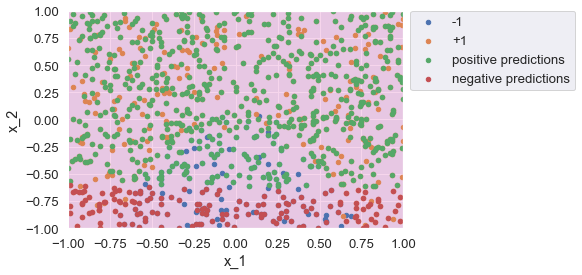


The parameter C in LinearSVC finds for a hyperplane that precisely divides as many instances as possible. As the value of C is very less in this case, i.e., 0.001, it gives us a greater margin and thus the hyperplane misclassifies more points. It happens oftenly that with very small values of C, we get misclassfied examples as the precision to separate the instances decreases.


In [14]:
b1_intercept = b1.intercept_[0]
weight1, weight2 = b1.coef_.T

m = -weight1/weight2
c = -b1_intercept/weight2

xmin, xmax = -1, 1
ymin, ymax = -1, 1

x_arr = np.array([xmin, xmax])
y_point = m*x_arr + c

plt.plot(x_arr, y_point, 'k', lw=1, ls='--')

plt.ylabel('x_2')
plt.xlabel('x_1')

plt.fill_between(x_arr, y_point, ymin, color='tab:green', alpha=0.3)
plt.fill_between(x_arr, y_point, ymax, color='tab:pink', alpha=0.3)

plt.scatter(X1[y==-1], X2[y==-1], s=20, alpha=1, label='-1')
plt.scatter(X1[y==1], X2[y==1], s=20, alpha=1, label='+1')
plt.scatter(*X_train[part_a2.predict(X_train)==1].T, s=20, alpha=1, label='positive predictions')
plt.scatter(*X_train[part_a2.predict(X_train)==-1].T, s=20, alpha=1, label='negative predictions')

plt.legend(bbox_to_anchor=(1, 1.03))

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

print(f'\nThe parameter C in LinearSVC finds for a hyperplane that precisely divides as many instances as possible. \
As the value of C is very less in this case, i.e., 0.001, it gives us a greater margin and thus the hyperplane \
misclassifies more points. It happens oftenly that with very small values of C, we get misclassfied examples as \
the precision to separate the instances decreases.')

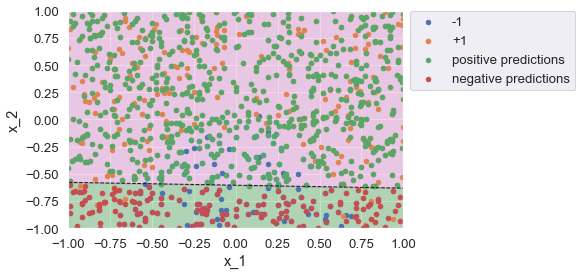

In [15]:
b2_intercept = b2.intercept_[0]
weight1, weight2 = b2.coef_.T

m = -weight1/weight2
c = -b2_intercept/weight2

xmin, xmax = -1, 1
ymin, ymax = -1, 1

x_arr = np.array([xmin, xmax])
y_point = m*x_arr + c

plt.plot(x_arr, y_point, 'k', lw=1, ls='--')

plt.ylabel('x_2')
plt.xlabel('x_1')

plt.fill_between(x_arr, y_point, ymin, color='tab:green', alpha=0.3)
plt.fill_between(x_arr, y_point, ymax, color='tab:pink', alpha=0.3)

plt.scatter(X1[y==-1], X2[y==-1], s=20, alpha=1, label='-1')
plt.scatter(X1[y==1], X2[y==1], s=20, alpha=1, label='+1')
plt.scatter(*X_train[part_a2.predict(X_train)==1].T, s=20, alpha=1, label='positive predictions')
plt.scatter(*X_train[part_a2.predict(X_train)==-1].T, s=20, alpha=1, label='negative predictions')

plt.legend(bbox_to_anchor=(1, 1.03))

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

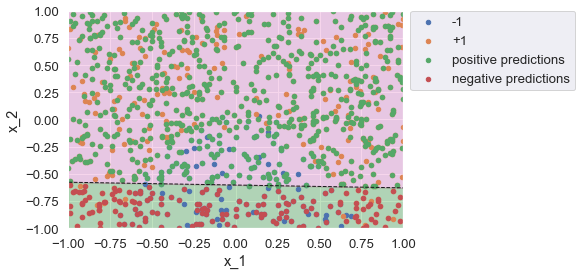

In [16]:
b3_intercept = b3.intercept_[0]
weight1, weight2 = b3.coef_.T

m = -weight1/weight2
c = -b3_intercept/weight2

xmin, xmax = -1, 1
ymin, ymax = -1, 1

x_arr = np.array([xmin, xmax])
y_point = m*x_arr + c

plt.plot(x_arr, y_point, 'k', lw=1, ls='--')

plt.ylabel('x_2')
plt.xlabel('x_1')

plt.fill_between(x_arr, y_point, ymin, color='tab:green', alpha=0.3)
plt.fill_between(x_arr, y_point, ymax, color='tab:pink', alpha=0.3)

plt.scatter(X1[y==-1], X2[y==-1], s=20, alpha=1, label='-1')
plt.scatter(X1[y==1], X2[y==1], s=20, alpha=1, label='+1')
plt.scatter(*X_train[part_a2.predict(X_train)==1].T, s=20, alpha=1, label='positive predictions')
plt.scatter(*X_train[part_a2.predict(X_train)==-1].T, s=20, alpha=1, label='negative predictions')

plt.legend(bbox_to_anchor=(1, 1.03))

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

## (b)(iii) 
Ans. The degree to which we want to avoid misclassifying each training example is set by the C parameter in SVM. The parameter C finds for a hyperplane that precisely divides as many instances as possible.  When the value of C is less, it gives us a greater margin and thus the hyperplane misclassifies more points. It happens oftenly that with very small values of C, we get misclassfied examples as the precision to  separate the instances decreases. When the value of C is large, a smaller-margin hyperplane is chosen.  It also depends on our dataset whether changing the value of C may produce a different output/hyperplane or not. For the first one where C=0.001, we can see that the decision boundary is not visible as when the value of C is less it gives us a greater margin and thus the hyperplane misclassifies more points.

## (b)(iv) 
Ans. The code snippet used in both the cases:

Logistic Regression:

part_a2 = LogisticRegression(random_state=10);

part_a2.fit(X_train, y_train);

print(part_a2.intercept_, part_a2.score(X_train, y_train), part_a2.score(X_test, y_test)); 

Scalar Vector Machine / SVM:

b2 = sklearn.svm.LinearSVC(random_state=1, C=1);

b2.fit(X_train, y_train);

print(b2.intercept_, b2.score(X_train, y_train), b2.score(X_test, y_test));

For the given dataset, the scatter plots are similar in both the cases. The main difference lies in the hyperplane  that separates the instances in the SVM model.
Scalar Vector Machine model or SVM model works over the geometrical properties of the given data. In SVM, we try to find an optimal hyperplane that precisely divides as many instances as possible. 
While, the Logistic Regression model that is used in part (a) works over the statiscal approach.

## (c)(i)

In [17]:
X3 = X1*X1
X4 = X2*X2

In [18]:
week2['X3'] = X3
week2['X4'] = X4
xNew = np.column_stack((X1,X2,X3,X4))
week2.head()

,# id:6-12-6,Unnamed: 1,Unnamed: 2,X3,X4
0,0.63,0.19,1,0.3969,0.0361
1,-0.52,0.28,1,0.2704,0.0784
2,0.75,-0.05,1,0.5625,0.0025
3,0.02,0.79,1,0.0004,0.6241
4,0.61,-0.85,-1,0.3721,0.7225


In [19]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(xNew, y, test_size=0.20, random_state=16)
part_c1 = LogisticRegression(random_state=10)
part_c1.fit(X_trainc, y_trainc)
print(part_c1.intercept_, part_c1.score(X_trainc, y_trainc), part_c1.score(X_testc, y_testc))

[0.6974162] 0.9586983729662077 0.975


In [20]:
print(f'The model intercept is : {part_c1.intercept_} \n')
print(f'The slopes are : {part_c1.coef_} \n')
print(f'The prediction rate on test data is : {part_c1.score(X_testc,y_testc)} \n')
print(f'The prediction rate on trained data is : {part_c1.score(X_trainc,y_trainc)} \n')
print(f'The confusion matrix for test data is : \n {confusion_matrix(y_testc, part_c1.predict(X_testc))} \n')
print(f'The confusion matrix for train data is : \n {confusion_matrix(y_trainc, part_c1.predict(X_trainc))} \n')
print(f'The model report on test data is : \n {classification_report(y_testc, part_c1.predict(X_testc))} \n')
print(f'The model report on trained data is : \n {classification_report(y_trainc, part_c1.predict(X_trainc))}')

The model intercept is : [0.6974162] 

The slopes are : [[0.28090421 5.07273611 7.4510681  0.23813245]] 

The prediction rate on test data is : 0.975 

The prediction rate on trained data is : 0.9586983729662077 

The confusion matrix for test data is : 
 [[ 34   4]
 [  1 161]] 

The confusion matrix for train data is : 
 [[153  27]
 [  6 613]] 

The model report on test data is : 
               precision    recall  f1-score   support

          -1       0.97      0.89      0.93        38
           1       0.98      0.99      0.98       162

    accuracy                           0.97       200
   macro avg       0.97      0.94      0.96       200
weighted avg       0.97      0.97      0.97       200
 

The model report on trained data is : 
               precision    recall  f1-score   support

          -1       0.96      0.85      0.90       180
           1       0.96      0.99      0.97       619

    accuracy                           0.96       799
   macro avg       0.96    

## (c)(ii)

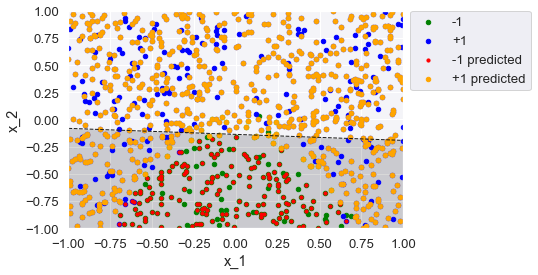

In [21]:
c2_intercept = part_c1.intercept_[0]
weight = weight1, weight2, weight3, weight4 = part_c1.coef_.T

m = -weight1/weight2
c = -c2_intercept/weight2

xmin, xmax = -1, 1
ymin, ymax = -1, 1

x_arr = np.array([xmin, xmax])
y_point = m*x_arr + c

plt.plot(x_arr, y_point, 'k', lw=1, ls='--')

plt.ylabel('x_2')
plt.xlabel('x_1')

plt.fill_between(x_arr, y_point, ymin, color='grey', alpha=0.3)
plt.fill_between(x_arr, y_point, ymax, color='white', alpha=0.5)

plt.scatter(X1[y==-1], X2[y==-1], s=20, alpha=1, label='-1', color='green')
plt.scatter(X1[y==1], X2[y==1], s=20, alpha=1, label='+1', color='blue')
plt.scatter(*X_train[part_c1.predict(X_trainc)==-1].T,s=10, alpha=1, label='-1 predicted', color='red')
plt.scatter(*X_train[part_c1.predict(X_trainc)==1].T, label='+1 predicted', s=20, color='orange')

plt.legend(bbox_to_anchor=(1, 1.03))

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

## (c)(iii)

In [22]:
from sklearn.linear_model import LinearRegression
baseline_predictor = LinearRegression()
baseline_predictor.fit(X_train, y_train)
print(f'The score for the Linear Model is : {baseline_predictor.score(X_train, y_train)}')

The score for the Linear Model is : 0.31053731216074376
